In [1]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
sns.set_style('white')

In [2]:
# Read data into a DataFrame.  diffrent year !!!!
data_url = '..\..\datasets\offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.csv'
data=pd.read_csv(data_url, dtype={'Murder': str,'Arson':str})

data.head()


,City,Population,ViolentCrime,Murder,Rape,Robbery,Assault,PropertyCrime,Burglary,LarcenyTheft,CarTheft,Arson
0,Adams Village,"1,851",0,0,NaN,0,0,11,1,10,0,0
1,Addison Town and Village,"2,568",2,0,NaN,1,1,49,1,47,1,0
2,Afton Village4,820,0,0,0,0,0,1,0,1,0,0
3,Akron Village,"2,842",1,0,NaN,0,1,17,0,17,0,0
4,Albany4,"98,595",802,8,54,237,503,"3,888",683,"3,083",122,12


In [3]:

#data['Population']=data['Population'].apply(fn)
print(data.dtypes)

City             object
Population       object
ViolentCrime     object
Murder           object
Rape             object
Robbery          object
Assault          object
PropertyCrime    object
Burglary         object
LarcenyTheft     object
CarTheft         object
Arson            object
dtype: object


In [4]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
df=data.drop(['City'],axis=1)
#  make pupulation a number
#dfm = df.apply(lambda x: x.str.replace(',','').apply(pd.to_numeri
dfm=df.apply(lambda x: x.str.replace(',','').apply(pd.to_numeric))
dfm.fillna(0, inplace=True)
print(list(dfm))

['Population', 'ViolentCrime', 'Murder', 'Rape', 'Robbery', 'Assault', 'PropertyCrime', 'Burglary', 'LarcenyTheft', 'CarTheft', 'Arson']


In [5]:

linear_formula = 'PropertyCrime ~Population + ViolentCrime + Murder + Rape + Robbery + Assault + PropertyCrime + Burglary + LarcenyTheft + CarTheft + Arson' 
# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=dfm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PropertyCrime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.569e+28
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:27:06   Log-Likelihood:                 7873.8
No. Observations:                 369   AIC:                        -1.572e+04
Df Residuals:                     357   BIC:                        -1.568e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.105e-14   8.91e-12      0.008      0.994   -1.74e-11    1.76e-11
Population    -1.475e-17   7.67e-16     -0.019      0.985   -1.52e-15    1.49e-15
ViolentCrime   6.395e-14   5.76e-12      0.011      0.991   -1.13e-11    1.14e-11
Murder         1.421e-13   1.42e-11      0.010      0.992   -2.79e-11    2.82e-11
Rape          -2.487e-14   6.28e-12     -0.004      0.997   -1.24e-11    1.23e-11
Robbery       -4.619e-14      6e-12     -0.008      0.994   -1.18e-11    1.17e-11
Assault       -2.132e-14   5.59e-12     -0.004      0.997    -1.1e-11     1.1e-11
PropertyCrime     1.0000   2.67e-11   3.75e+10      0.000       1.000       1.000
Burglary      -3.197e-14   2.67e-11     -0.001      0.999   -5.25e-11    5.24e-11
LarcenyTheft  -1.243e-14   2.67e-11     -0.000      1.000   -5.25e-11    5.24e-11
CarTheft       5.329e-15   2.67e-11      0.000      1.000   -5.25e-11    5.25e-11
Arson         -8.882e-15   3.46e-12     -0.003      0.998   -6.82e-12     6.8e-12
==============================================================================
Omnibus:                      868.594   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1996453.069
Skew:                         -18.915   Prob(JB):                         0.00
Kurtosis:                     361.357   Cond. No.                     3.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's look at the coefficients of our model.

And at the p-values as a significance test for each of the coefficients.

In [6]:
lm.pvalues

Intercept        0.993641
Population       0.984666
ViolentCrime     0.991147
Murder           0.992045
Rape             0.996844
Robbery          0.993858
Assault          0.996959
PropertyCrime    0.000000
Burglary         0.999044
LarcenyTheft     0.999628
CarTheft         0.999841
Arson            0.997954
dtype: float64

Finally, here's our $R^2$:

In [7]:
lm.rsquared

1.0

In [8]:
lm.conf_int()

,0,1
Intercept,-1.744993e-11,1.759204e-11
Population,-1.522516e-15,1.493026e-15
ViolentCrime,-1.126207e-11,1.138997e-11
Murder,-2.787001e-11,2.815422e-11
Rape,-1.238134e-11,1.233160e-11
Robbery,-1.183760e-11,1.174523e-11
Assault,-1.101138e-11,1.096874e-11
PropertyCrime,1.000000e+00,1.000000e+00
Burglary,-5.247015e-11,5.240620e-11
LarcenyTheft,-5.245675e-11,5.243188e-11


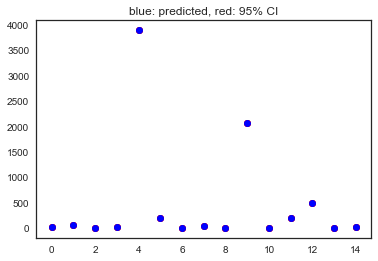

In [9]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

#### Analyzing the model
The whole model doesn't look right. What can be done to fix it? 
Does it explain the variance? Can we drop anything without loosing much? 
What will be theresult of dropping half of variables?


In [11]:
# evaluating the whole model
from sklearn.feature_selection import f_regression
# need to prepare X np.array , y np.array 

#dfm f_test, _ = f_regression(X, y) 


#
### let's try it different way
#

In [12]:
from sklearn.decomposition import PCA
pr=dfm.drop(['PropertyCrime'],axis=1)
# now we have only numbers
pca = PCA(n_components=3)
pcs = pca.fit_transform(pr)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

y=dfm['PropertyCrime']
X_train, X_test, y_train, y_test = train_test_split(pcs, y, test_size=0.2, random_state=20)

# now fit and get the model on train data
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
# try 
y_pred= regr.predict(X_train)
resid = y_train - y_pred
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR2-squared:' )

#print(regr.score(pr_t.ravel, y_train.ravel))
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred))
# need two separate things fit and model with clear comments on what exactly they are doing 
#


Coefficients: 
 [ 0.01606324  1.37765089  0.05883274]

Intercept: 
 696.079319907

R2-squared:
0.999968781251


In [14]:
# now on test set 
ytest_pred= regr.predict(X_test)
resid = y_test - ytest_pred
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR2-squared:' )

#print(regr.score(pr_t.ravel, y_train.ravel))
print(r2_score(y_test, ytest_pred))
# need two separate things fit and model with clear comments on what exactly they are doing 
#


Coefficients: 
 [ 0.01606324  1.37765089  0.05883274]

Intercept: 
 696.079319907

R2-squared:
0.978114981685


In [15]:
# ------------- looks ok ------------


In [16]:
from sklearn.model_selection import cross_val_score
data=pcs
target =y
cv_scores = cross_val_score(regr , data, target, cv=5)
print("cross_val_scores: ", cv_scores, 'mean for cv_scores', np.mean(cv_scores))


cross_val_scores:  [ 0.99935899  0.99482517  0.99090626  0.98890779  0.99535482] mean for cv_scores 0.993870606198


In [17]:
# ---- looks OK

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt    

rms = sqrt(mean_squared_error( y_train , y_pred))
print(" root of  mean_squared_error", rms)

 root of  mean_squared_error 44.36063017552594


In [19]:
rms = sqrt(mean_squared_error( y_test , ytest_pred))
print(" root of  mean_squared_error", rms)

 root of  mean_squared_error 38.781934813708276


## KNN model:  Nearest Neighbor.
 
 we use pca , then  separate test and train and predict 
 

In [45]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=2)
#
# data better be normalized; so we will use X after fillna and pca 
#
X = pcs
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
neighbors.fit(X,y)
y = neighbors.predict(X)
cv_scores = cross_val_score(neighbors, X, y, cv=7)
print("cross_val_scores: ", cv_scores, 'mean for cv_scores', np.mean(cv_scores))


cross_val_scores:  [ 0.77108434  0.75        0.88059701  0.94230769  0.85294118  1.          1.        ] mean for cv_scores 0.885275745865


C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=7.
  % (min_groups, self.n_splits)), Warning)


In [46]:
# try  with holdout
#  i am still using pca!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
neighbors.fit(X_train,y_train)
ytrain_pred = neighbors.predict(X_train)
print ('R2 for Train data with pca')
print(r2_score(y_train, ytrain_pred))

ytest_pred = neighbors.predict(X_test)
print ('R2 for Test data with pca')
print(r2_score(y_test, ytest_pred))


R2 for Train data with pca
0.9987831501
R2 for Train data with pca
0.774825201941


0.128632388064
